<a href="https://colab.research.google.com/github/khanh22mse23057/Semester2-DIP/blob/main/%5BDigital_Image_and_Video_Processing%5D_Quiz_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Load the Dependencies

> This section loads some required libraries used in this notebook: **numpy**, **pandas**, **cv2**, **skimage**, **PIL**, **matplotlib**

*   [Numpy](https://www.numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
*   [Pandas](https://pandas.pydata.org/) is a library for data manipulation and data analysis.
*   [CV2](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_gui/py_image_display/py_image_display.html) is a library for computer vision tasks.
*   [Skimage](https://scikit-image.org/) is a library which supports image processing applications on python.
*   [Matplotlib](https://matplotlib.org/) is a library which generates figures and provides graphical user interface toolkit.

In [8]:
import cv2 
import urllib as URL
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

import requests
from io import BytesIO
from PIL import Image
%matplotlib inline

### Some image helper functions

In [9]:
def im2double(imgPath):
   img = cv2.imread(imgPath, cv2.IMREAD_GRAYSCALE)
   if img is not None:
      img = img.astype(np.float32) / 255.0 # Divide all values by the largest possible value in the datatype
   return img 

In [10]:
def imshow(title, image):
  print(title)
  cv2_imshow(image)
# Check Image Information
def image_infor(image):
  # Check the image matrix data type (could know the bit depth of the image)
  print(image.dtype)
  # Check the height of image 
  print(image.shape[0])
  # Check the width of image 
  print(image.shape[1])
  # Check the number of channels of the image
  print(image.shape[2])


Read Image from Urls

> Read a color image from the Internet (i.e., nature.jpg). Display its red,
green and blue component separately.

In [11]:
!wget -q "https://i.ibb.co/bKTdRWt/shapes.png"
!wget -q "https://i.ibb.co/TKkSJPK/coins.jpg"

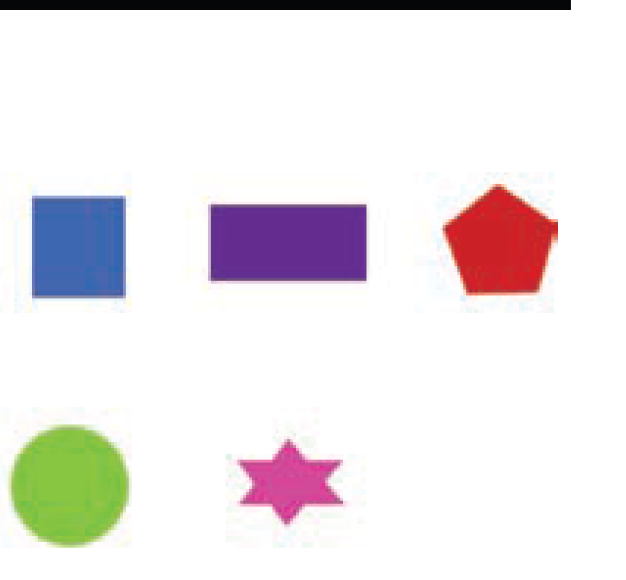

In [12]:
original_image =   cv2.imread('shapes.png', cv2.IMREAD_COLOR)
cv2_imshow(original_image)

# Quiz 02

## EXAMPLE 1
Convert the objects’ color as follows: the square to red, the rectangle to
green, the pentagon to blue, the circle to magenta and the star to cyan.


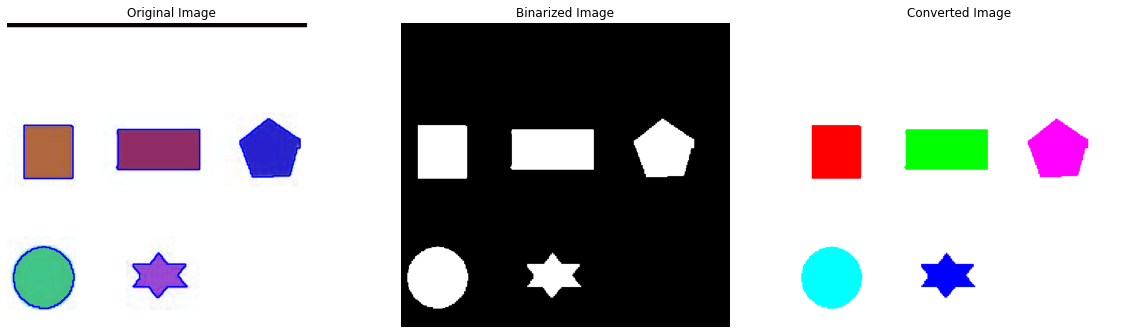

In [13]:
import cv2
import numpy as np

# Load image and convert to grayscale
img = cv2.imread('shapes.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray_img[:20,:] = 255

# Binarize image
level, bw_img = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Convert to color image
num_labels, labeled_img = cv2.connectedComponents(bw_img)
colors = np.array([[255, 0, 255], [255, 0, 0], [0, 255, 0], [0, 255, 255], [0, 0, 255]], dtype=np.uint8)
rgb_label = np.zeros_like(img)
for label in range(1, num_labels):
    rgb_label[labeled_img == label] = colors[label-1]
    rgb_label[labeled_img == 0] = 255

# Ignore small objects
min_poly_size = 2000
bg = labeled_img > 0
regs, _ = cv2.findContours(bg.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
regs = [reg for reg in regs if cv2.contourArea(reg) >= min_poly_size]

# Draw contours on original image
cv2.drawContours(img, regs, -1, (0, 0, 255), 2)

# Show images
fig, axs = plt.subplots(1, 3, figsize=(20, 10))

axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')
axs[1].imshow(bw_img, cmap='gray')
axs[1].set_title('Binarized Image')
axs[1].axis('off')
axs[2].imshow(rgb_label, cmap='gray')
axs[2].set_title('Converted Image')
axs[2].axis('off')
plt.show()


## EXAMPLE 2
(a) Convert the original image to binary and display the result.</br>
(b) Use erosion and/or dilation to draw the edge of the objects. You can
choose any structuring element to apply.</br>
(c) Generate a structuring element as below. Could we count the number
of coins using this structuring element?</br>

\begin{pmatrix}
  0 & 1 & 1 & 0 \\
  1 & 0 & 0 & 1 \\
  1 & 0 & 0 & 1 \\
  0 & 1 & 1 & 0
 \end{pmatrix}

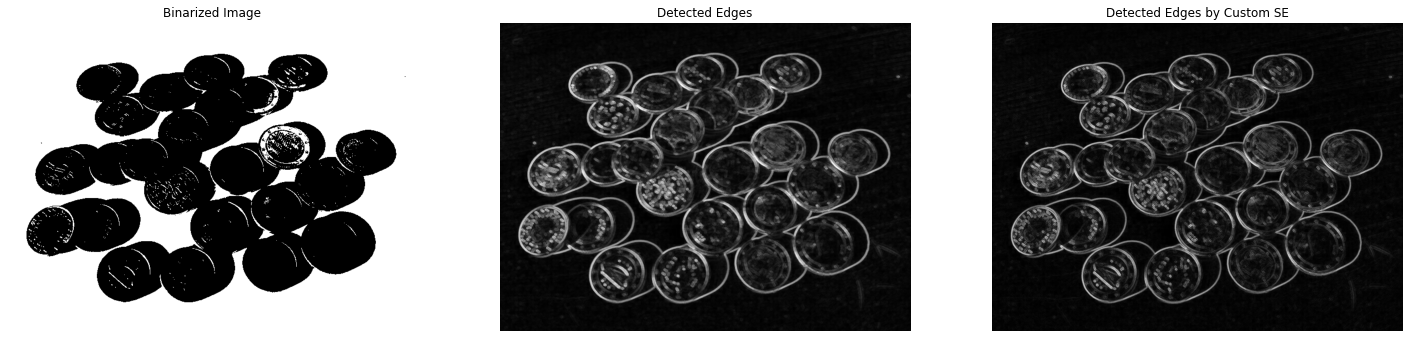

In [14]:
#load image
Img = cv2.imread('coins.jpg', cv2.IMREAD_GRAYSCALE)

#a. binarize image
level, bwImg = cv2.threshold(Img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#b. choose any structuring element
se = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
Img_dilated = cv2.dilate(Img, se)
Img_eroded = cv2.erode(Img, se)
edge1 = Img_dilated - Img
edge2 = Img - Img_eroded
edge3 = edge1 + edge2

#c. create your own structuring element
se1 = np.array([[0, 1, 1, 0], [1, 0, 0, 1], [1, 0, 0, 1], [0, 1, 1, 0]], dtype=np.uint8)
Img_dilated = cv2.dilate(Img, se1)
Img_eroded = cv2.erode(Img, se1)
edge1 = Img_dilated - Img
edge2 = Img - Img_eroded
edge3_ = edge1 + edge2

# Show images
fig, axs = plt.subplots(1, 3, figsize=(25, 10))

axs[0].imshow(bwImg, cmap='gray')
axs[0].set_title('Binarized Image')
axs[0].axis('off')
axs[1].imshow(edge3, cmap='gray')
axs[1].set_title('Detected Edges')
axs[1].axis('off')
axs[2].imshow(edge3_, cmap='gray')
axs[2].set_title('Detected Edges by Custom SE')
axs[2].axis('off')
plt.show()
